In [1]:
import milk
from matplotlib import pyplot as plt
import numpy as np
import cv2

/Users/awang/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = milk.buildDataset('data/tinytest/')


png directory exists


In [3]:
test = np.pad(data[44]['manifest'], (200,200), 'constant', constant_values=255)

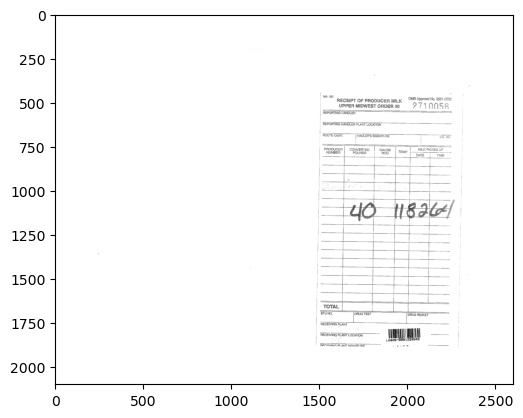

In [4]:
plt.imshow(test, cmap='gray')

In [48]:
img = test

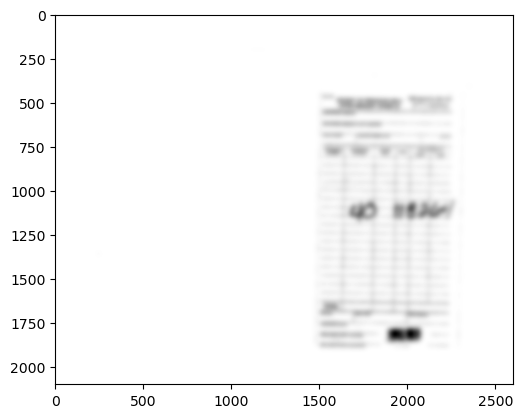

In [50]:
blurred = cv2.GaussianBlur(img, (101, 101), 0)
plt.imshow(blurred, cmap='gray')

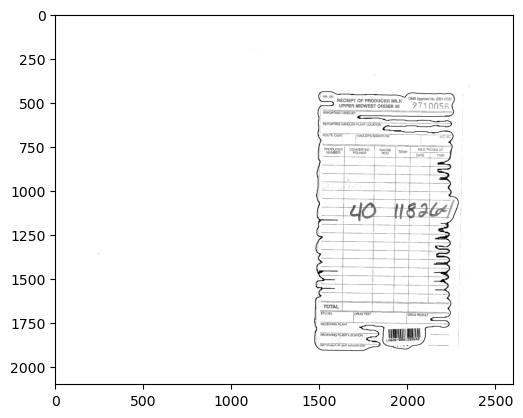

In [56]:
img_gray = blurred
#threshold one more time for better results.
ret, thresh = cv2.threshold(img_gray, 250, 255, cv2.THRESH_BINARY)

#find the contours
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

c=[]

for i in range(0,len(contours)):
    area=cv2.contourArea(contours[i])
    if(area>200000 and area < 5000000):
          c.append(contours[i])
#make a copty of the image and use it to show the before and after result
image_copy = img.copy()

#draw controus on the copied image
cv2.drawContours(image=image_copy, contours=c, contourIdx=-1 , color=0, thickness=2, lineType=cv2.LINE_AA)

plt.imshow(image_copy, cmap='gray')


In [36]:
a=np.empty((1900,2400))
a.fill(255)
a

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [57]:
cont=cv2.drawContours(image=a, contours=c, contourIdx=-1 , color=0, thickness=2, lineType=cv2.LINE_AA)

439 1472 1899 2290


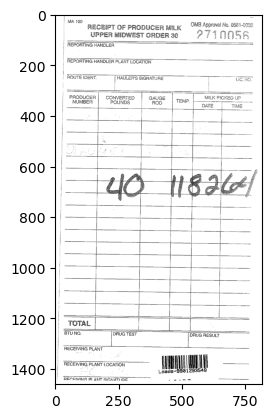

In [61]:
coords = np.argwhere(cont < 240)
x_min, y_min = coords.min(axis=0)
x_max, y_max = coords.max(axis=0)
print(x_min, y_min, x_max, y_max)
b = cropped = img[x_min:x_max+1, y_min:y_max+1]
plt.imshow(b, cmap='gray')

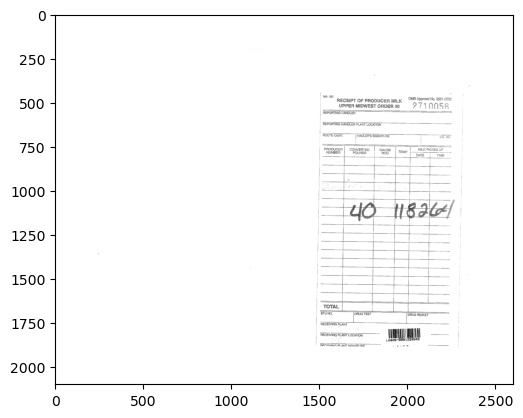

In [62]:
plt.imshow(img,cmap='gray')